In [2]:

from network_models.soundsream_models_and_utils.ss_encoded_dataset import ss_encoded_dataset_full
import torch
from torch.utils.data import DataLoader

dataset_0_2_sec = ss_encoded_dataset_full(csvPath="/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/datasets/clip_encoded/all_encodings_with_umap_0_2_sec.pkl")
dataset_1_sec = ss_encoded_dataset_full(csvPath="/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/datasets/clip_encoded/all_encodings_with_umap_1_sec.pkl")
dataset_3_5_sec = ss_encoded_dataset_full(csvPath="/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/datasets/clip_encoded/all_encodings_with_umap_3_5_sec.pkl")
dataset_5_sec = ss_encoded_dataset_full(csvPath="/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/datasets/clip_encoded/all_encodings_with_umap_5_sec.pkl")

2023-03-01 13:56:13.837489: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-01 13:56:14.266093: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-01 13:56:14.266144: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-01 13:56:14.266148: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [64]:
from pathlib import Path
import pandas as pd
import numpy as np
from numpy import ndarray
json_path ="/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/results/3_5_sec/"



def genAvgAndAvgPerEmotion(data: pd.DataFrame, labelList: list):
    d = pd.DataFrame()
    d["emotion"] = []
    d["mean"] = []
    d["var"] = []
    for emotion in labelList:
        dIter = pd.DataFrame()
        dfEmo = data.loc[data["clear_emotion"].isin([emotion])]
        npEmo = np.array([point.numpy() for point in dfEmo["pca"].values.tolist()])
        dIter["emotion"] = [emotion]
        dIter["mean"]= [npEmo.mean(axis=0)]
        dIter["var"] = [npEmo.var(axis=0)]
        d = pd.concat([d, dIter], ignore_index=True)
        #d.append(dIter)
    return d


def generateJson(data):
    str = "{"
    for i in range(len(data)):
        str += f"\"x{i+1}\": {data[i]}"
        str += "," if i < len(data)-1 else ""
    str += "}"
    return(str)

def writeJson(emotion, string, apendix=""):
    Path(json_path).mkdir(parents=True, exist_ok=True)
    print(f"writing: {string} \n to {json_path+emotion}.json")
    file = open(json_path+f"{emotion}{apendix}.json", "w")
    file.write(string)
    file.close()

def write_latex(fileName, string):
    print(f"writing: {string} \n to {json_path+fileName}.txt")
    file = open(json_path+f"{fileName}.txt", "w")
    file.write(string)
    file.close()

In [67]:
df = dataset_3_5_sec.encoded_dataset.encodedData
dfTess = df.loc[df["dataset"].isin(["tess"])]
labels = dfTess["clear_emotion"].unique().tolist()
# dfEmo = dfTess.loc[dfTess["clear_emotion"].isin(["happy"])]
# np.array([point.numpy() for point in dfEmo["pca"].values.tolist()]).mean(axis=0)
df = genAvgAndAvgPerEmotion(dfTess, dfTess["clear_emotion"].unique().tolist())

for label in labels:
    line = df.loc[df["emotion"].isin([label])]["mean"].tolist()[0]
    writeJson(label, generateJson(line), apendix="_tess")
#df.loc[df["emotion"].isin(["happy"])]["mean"].tolist()[0]

writing: {"x1": 0.34437307715415955,"x2": 0.347582072019577,"x3": -0.322283536195755,"x4": 0.6567435264587402} 
 to /home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/results/3_5_sec/disgust.json
writing: {"x1": 0.5563812851905823,"x2": 0.6855799555778503,"x3": -0.6452735066413879,"x4": -0.03739982098340988} 
 to /home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/results/3_5_sec/angry.json
writing: {"x1": 0.35122954845428467,"x2": 0.1364726424217224,"x3": -0.3918238878250122,"x4": -0.6335256695747375} 
 to /home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/results/3_5_sec/happy.json
writing: {"x1": 0.752733588218689,"x2": -0.009091964922845364,"x3": 0.16249440610408783,"x4": -0.01481762807816267} 
 to /home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/results/3_5_sec/fear.json
writing: {"x1": 0.3253295123577118,"x2": 0.492442846

array([ 0.35122955,  0.13647264, -0.3918239 , -0.63352567], dtype=float32)

In [ ]:
#asaa = pd.DataFrame(genAvgFull([arra, arra_dr], data_set.encoded_dataset.label_list ,["conv", "dimred"]))


# write_latex("conv_mean_var" ,asaa["conv"].T.to_latex(float_format="{{:0.2f}}"))
# write_latex("dimred_mean_var" ,asaa["dimred"].T.to_latex(float_format="{{:0.2f}}"))
# #asaa["conv"].to_latex()

In [71]:
from utils.utils__evalutation import show_bars
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns



def show_bars_local(predictions, label_list, color="r", title_string =""):

    show_bars(predictions, label_list, color, title_string)



In [80]:
dict = {}
for label in labels:
    emo = dfTess.loc[dfTess['clear_emotion'].isin([label])]
    dict.update({label: [dp.numpy() for dp in emo["pca"].tolist()]})

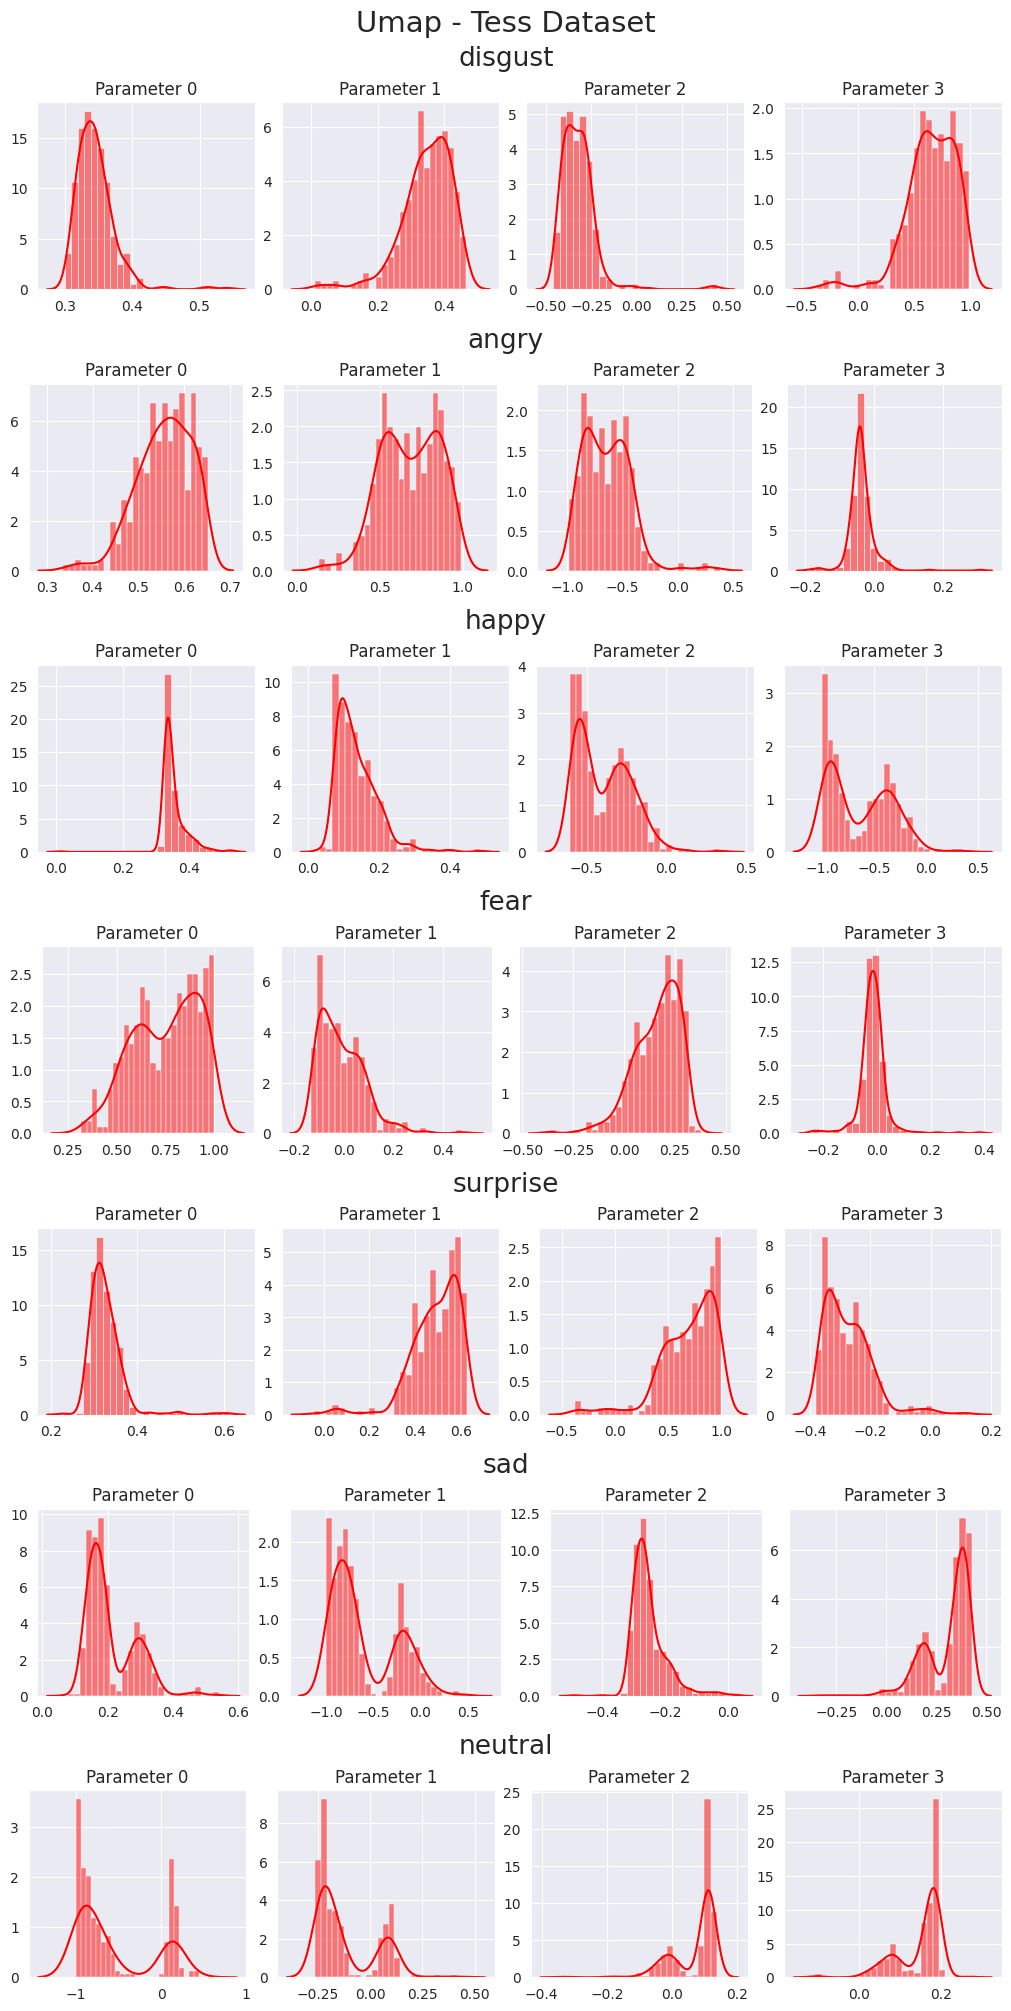

In [84]:

show_bars_local(dict, labels, color="r", title_string="Umap - Tess Dataset")